# Assignment 1

# Group 5:
# Guan, Fuqi; Qiu Yicheng; Wu, Fan; Zhao, Yidong; Zheng Hanwen


## Task 1.

***Sol***:

+ 1.
$X$ uniformly distrubuted $C_1$, volume of $C_1$ is $1^p=1$, and volume of $C_d$ equals to $d^p$.   
Hence,  
$Pr(X \in C_d)= \min({d^p}, 1.0)$. For $d \leq 1, Pr(X \in C_d)= d^p $ .  
Given $Pr(X \in C_d)= d^p = q$, that is, $d = q^{\frac{1}{p}}$(for $d \leq 1$).  

-------------------------------------
  
+ 2.
Given that all components $X^i, i\in\{1,2,...,p\}$ are i.i.d. and conform to standard normal distribution,
we have  
$Pr(\Vert X^i \Vert \leq 2.576) =  Pr(\Vert X^1 \Vert \leq 2.576) = 0.99$, for all $i\in\{1,2, ...,p\}$.  
Then,  
$Pr(\Vert X^p \Vert_\infty \ge 2.576) = 1 - \prod_{i=1}^{p}Pr(\Vert X^i\Vert \leq 2.576) = 1-0.99^p$  
For $p=2, 3, 500$, calculation of values of $Pr(\Vert X^p\Vert_\infty \ge 2.576)$ are shown as following:  
(which are 0.0199, 0.0297, 0.9934 respectively).

In [48]:
def Pr(p):
    return (1-0.99**p)
print('Pr=%.4f, p=2\nPr=%.4f, p=3\nPr=%.4f, p=500'%( Pr(2), Pr(3), Pr(500)))

Pr=0.0199, p=2
Pr=0.0297, p=3
Pr=0.9934, p=500


------------------
## Task 2.

***sol:***

sampling and determining the minimum angles are finished in function `determ_minangles`, which calls `uniform_sample`

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt


def uniform_sample(n_samp, n_dim, lb=-1, hb= 1):
    '''generate [n_samp] uniform distributed samples in [n_dim]-dimensional hypercubes'''
    samples = np.random.rand(n_samp, n_dim) * (hb-lb) + lb
    return samples

def vec_angles(vec1, vec2):
    '''calculate anlge of two vectors'''    
    cos_val = min(np.dot(vec1, vec2)/(la.norm(vec1)*la.norm(vec2)), 1.0) # for numerical stability
    cos_val = max(cos_val, -1.0)
    return np.arccos(cos_val)

def determ_minangles(n_samp, n_dim, printmins = False, printaver = True):
    '''determining the minimum angles of each of the [n_samp] samples in [n_dim] hypercube to other vectors'''
    samples = uniform_sample(n_samp, n_dim)    # sampling
    min_angles = np.zeros(n_samp)
    
    for r in range(n_samp):
            # angles of each vector to all others
            angles_r = np.array( [vec_angles(samples[r,:], samples[c,:]) \
                  for c in range(n_samp) if c != r] )
            min_angles[r] = np.amin(angles_r)   # determine minimum angle of each vector to all others
    
    min_aver = np.average(min_angles)   # average minimum
    if printmins:
        print('minimum angles to all other samples of {0} samples:\n'.format(n_samp),
              min_angles)
    if printaver:
        print('average of minimum angles in %d dim space: %.4f rad ( %.4f deg)'%(n_dim,
                                                                                 min_aver,
                                                                                 min_aver*180/np.pi))
    
    return (samples, min_angles, min_aver)

+ 1. & 2.
Sampling 100 vectors and determing minimum of these 100 sampled vectors to all other vectors, then calculating the average of these minimum angles. Here is function `determ_minangles` defined above called . **Here, in the 2-dimensional case, the average of mimium angles to other vectors is 0.0355 rad (2.0333 deg).**

In [3]:
Nsamples = 100
Ndim = 2
(samples, min_angles_2dim, min_aver_2dim) = determ_minangles(Nsamples, Ndim, printmins = True)

minimum angles to all other samples of 100 samples:
 [0.00405174 0.05446717 0.00450194 0.02455697 0.02401861 0.01383739
 0.1861538  0.00430015 0.00576067 0.02820126 0.04409648 0.05998562
 0.00749416 0.044962   0.00866106 0.00184091 0.01932226 0.03554081
 0.02455697 0.01515749 0.03554081 0.00911606 0.01982351 0.00361064
 0.00911606 0.07792085 0.00405174 0.00490562 0.00450194 0.00568989
 0.07346242 0.09557822 0.08514761 0.00620644 0.03456485 0.03550306
 0.00866106 0.05206523 0.00704736 0.00291635 0.00759287 0.00998619
 0.00620644 0.04981922 0.01383739 0.09678082 0.00291635 0.00490562
 0.01160775 0.06478433 0.02521328 0.00568989 0.04687215 0.01197329
 0.01197329 0.07205747 0.01529863 0.07458815 0.05998562 0.0210496
 0.06005468 0.00430015 0.03980858 0.03769041 0.01820615 0.06323282
 0.01502826 0.03586559 0.09678082 0.05502958 0.0466939  0.04687215
 0.00361064 0.09557822 0.0208851  0.02401861 0.05218646 0.02521328
 0.00576067 0.01515749 0.01529863 0.04513609 0.03456485 0.05340798
 0.0099861

+ 3.
Repeat the progress above for dimensions $d=1,2,..., 1000$


In [4]:
highest_dim = 1000
# for all dimension from 1 to 1000, evaluate the average of angle minima
min_aver_arr =np.array([[d,determ_minangles(Nsamples, d,printaver = False)[2]] 
                        for d in range(1, highest_dim+1,1)])

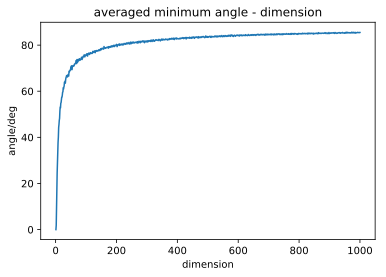

In [5]:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.plot(min_aver_arr[:,0], 180*min_aver_arr[:,1]/np.pi)
plt.title('averaged minimal angle - dimension')
plt.xlabel('dimension')
plt.ylabel('angle/deg')
plt.show()

+ 4.
As the dimension increases, the averaged minimum angles converge approxiamately to 90 degrees. If 2 vectors are close to each other, the angle of them should be relative small. From the result shown in the picture, we can probably draw the conclusion that, the uniformly sampled vectors are so sparsely located in a high dimensional space that none of the sampled vector pairs are close to each other. That is, 2 randomly samply vectors in high dimensional space should be far way from each other.

-------------------------


+ 5.
It turns out that the number of samples has little effect on the result, as shown in the experiment below, although with the increasing of number of samples, the rate of convergence decreases.


In [6]:
highest_dim = 200
Nsamples = 6
# for all dimension from 1 to [highest_dim], evaluate the average of minimal angles
min_aver_arr_1 = np.array([ [d, determ_minangles(Nsamples, d, printaver=False)[2]  ]\
                           for d in range(1, highest_dim+1,1)])


In [7]:
Nsamples = 50
# for all dimension from 1 to [highest_dim], evaluate the average of minimal angles
min_aver_arr_2 = np.array([ [d, determ_minangles(Nsamples, d,printaver=False)[2]   ]\
                           for d in range(1, highest_dim+1,1)])

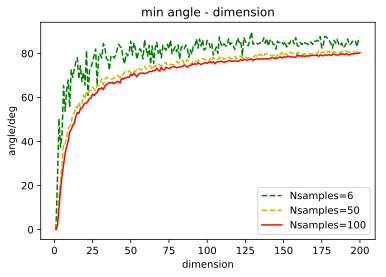

In [8]:
plt.plot(min_aver_arr_1[:,0], 180*min_aver_arr_1[:,1]/np.pi, 'g--'
         ,min_aver_arr_2[:,0], 180*min_aver_arr_2[:,1]/np.pi, 'y--'
         ,min_aver_arr[:highest_dim,0], 180*min_aver_arr[:highest_dim,1]/np.pi , 'r-'
        )
    
plt.title('min angle - dimension')
plt.legend(('Nsamples=6','Nsamples=50','Nsamples=100'))
plt.xlabel('dimension')
plt.ylabel('angle/deg')
plt.show()

## Task 3.
**Sol**
+ 1.
Yes, this table is a probability table. All elements in the table $0\leq P_{X,Y}(X=x,Y=y) \leq 1$ and summation of all elements equals to $1$.  


+ 2.
$\mathbb{E}_{Y|X=2}(Y)=\sum\limits_{y=1}^3 y\cdot P_{Y|X=2}(Y=y)=1*0.4+2*0.14+0.05*3= 0.83$  


+ 3.
 $\int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty} p(x,y) dx dy = \dfrac{1}{2} \neq 1$, so function $p(x,y)$ cannot be a joint density function for 2 variables.


+ 4.
marginal distributions:  
$p_{X}(x) = \int_{-\infty}^{+\infty}p(x,y)dy = \int_{x}^{+\infty}2e^{-(x+y)}dy =2e^{-x}\int_{x}^{+\infty}e^{-y}dy = -2e^{-x}e^{-y}\rvert_x^{+\infty}=2e^{-2x}$  
$p_{Y}(y) = \int_{-\infty}^{+\infty}p(x,y)dx=\int_{0}^{y}2e^{-(x+y)}dx=2e^{-y}\int_{0}^{y}e^{-x}dx=-2e^{-y}e^{-x}\rvert_0^y=2e^{-y}(1-e^{-y})$


+ 5.
$p(X\leq2|Y=0.5)=\int_{0}^{2} \frac{1}{15}(2x+2) dx=\frac{8}{15}$ 

-----------------

# Task 4
### 1. Symmetric:
$C_{ij}=cov(X_i,X_j)=E[(x_i-\mu_i)(x_j-\mu_j)]=E[(x_j-\mu_j)(x_i-\mu_i)]=cov(X_j,X_i)=C_{ji}$
### 2. Semi-positiv:
$x^TCx=x^TE[(X-\mu)(X-\mu)^T]x=E[x^T(X-\mu)(X-\mu)^Tx]$
$      =E[((X-\mu)^Tx)^T((X-\mu)^Tx)]=E[(|(X-\mu)^Tx)|^2]\geq0$
